In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
columns = ["User", "Item1", "Item2", "Item3", "Item4", "Item5"]
data = np.array([["Alice",8,1,None,2,7],["Bob",2,None,5,7,5],["Margaret",5,4,7,4,7],["Mordred",7,1,7,3,8],
                 ["Sheepen",1,7,4,6,5], ["Joline",8,3,8,3,7]])
df = pd.DataFrame(data, columns=columns).set_index("User")
df

,Item1,Item2,Item3,Item4,Item5
User,,,,,
Alice,8,1,None,2,7
Bob,2,None,5,7,5
Margaret,5,4,7,4,7
Mordred,7,1,7,3,8
Sheepen,1,7,4,6,5
Joline,8,3,8,3,7


### Calculate pairwise similarity

In [24]:
def variance(l, avg):
    a_variance = 0
    for i in range(l.shape[0]):
        a_variance += (l[i] - avg)**2
    return a_variance **0.5

In [119]:
def get_mask(a_list, b_list, df):
    mask_a = df.iloc[0,:].notna()
    mask_b = df.iloc[1,:].notna()
    return mask_a & mask_b


In [120]:
def get_shared_items(a, b, df):
    a_list = df.loc[a]
    b_list = df.loc[b]
    mask = get_mask(a_list, b_list, df)
    return a_list[mask], b_list[mask]

In [121]:
def similarity(a, b, df = df):
    a_list, b_list = get_shared_items(a, b, df)

    a_avg = np.average(a_list)
    b_avg = np.average(b_list)

    sum_of_similarities = 0
    for i in range(a_list.shape[0]):
        sum_of_similarities += (a_list[i] - a_avg)*(b_list[i] - b_avg)
    sum_of_similarities

    a_variance = variance(a_list, a_avg)
    b_variance = variance(b_list, b_avg)
    return (sum_of_similarities / (a_variance * b_variance))


In [124]:
similarity("Margaret", "Alice")


0.6449020216370243

In [147]:
def calculate_similarities(df = df):
    indexes = np.array(df.index)

    n = indexes.shape[0]
    similarities = np.empty([n, n])
    for i, a in enumerate(indexes):
        for j, b in enumerate(indexes):
            similarities[i,j] = similarity(a,b, df)
    return similarities


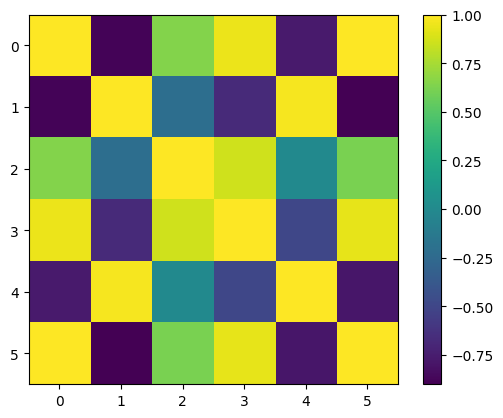

In [148]:
similarities = calculate_similarities(df)
plt.imshow(similarities)
plt.colorbar()

### Generate random noise and find similarities

In [153]:
rand_df = pd.DataFrame(np.random.random([10,30]))
rand_df = rand_df.add_prefix("Signal ")
rand_df = rand_df.T.add_prefix("Value ")
rand_df

,Value 0,Value 1,Value 2,Value 3,Value 4,Value 5,Value 6,Value 7,Value 8,Value 9
Signal 0,0.190705,0.887336,0.574465,0.484425,0.778955,0.396855,0.604670,0.373851,0.956564,0.391999
Signal 1,0.846897,0.693006,0.783840,0.486084,0.124576,0.665116,0.713255,0.479861,0.727470,0.813528
Signal 2,0.457320,0.010687,0.658288,0.093587,0.420950,0.717128,0.063602,0.475213,0.877166,0.824407
Signal 3,0.644788,0.448807,0.111487,0.647279,0.402241,0.238768,0.044194,0.150350,0.597814,0.776695
Signal 4,0.667513,0.483736,0.525739,0.371568,0.489470,0.031872,0.056112,0.689178,0.185434,0.823731
Signal 5,0.076576,0.017721,0.251529,0.514102,0.731558,0.301723,0.060986,0.048655,0.842891,0.591031
Signal 6,0.912009,0.232155,0.648823,0.225063,0.083296,0.116022,0.745280,0.834834,0.701276,0.270649
Signal 7,0.589723,0.972189,0.582117,0.673210,0.000255,0.812211,0.317869,0.003815,0.414849,0.190169
Signal 8,0.616246,0.804225,0.385518,0.015190,0.767396,0.239251,0.528947,0.986710,0.977875,0.735212
Signal 9,0.197260,0.385118,0.473473,0.788796,0.306071,0.960724,0.424245,0.146281,0.885177,0.492661


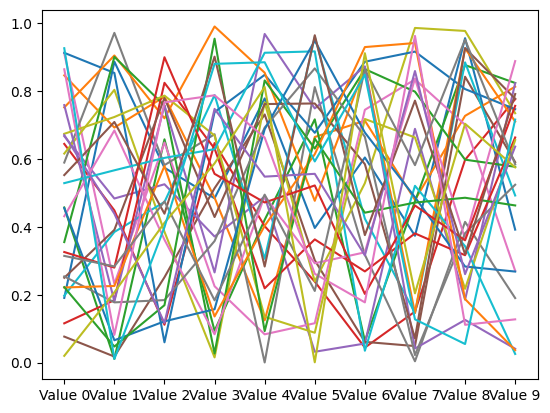

In [154]:
plt.plot(rand_df.T)
plt.show()

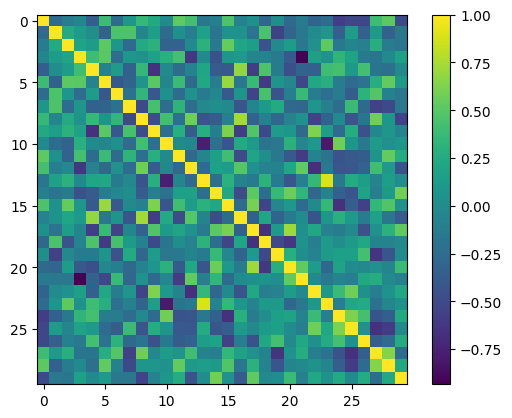

In [155]:
similarities = calculate_similarities(rand_df)
plt.imshow(similarities)
plt.colorbar()

In [156]:
def find_best_pair(similarities):
    best_i, best_j, best_value = 0, 0, 0
    for i in range(similarities.shape[0]):
        for j in range(i+1, similarities.shape[1]):
            if similarities[i,j] > best_value:
                best_value = similarities[i,j]
                best_i = i
                best_j = j
    return best_i, best_j, best_value

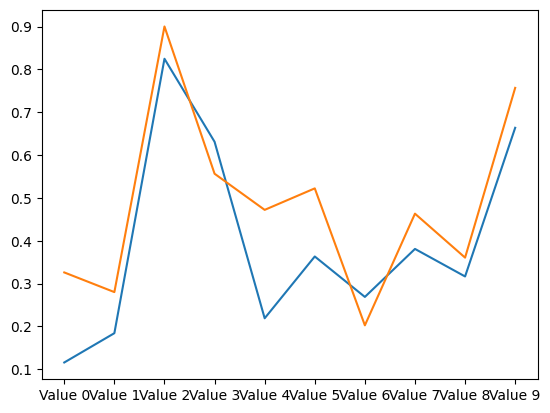

In [157]:
best_i, best_j, best_value = find_best_pair(similarities)
plt.plot(rand_df.iloc[best_i])
plt.plot(rand_df.iloc[best_j])

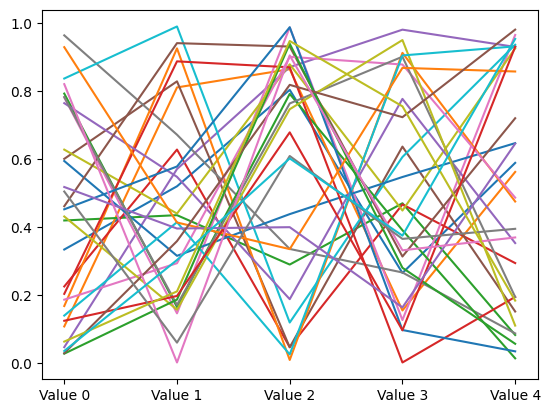

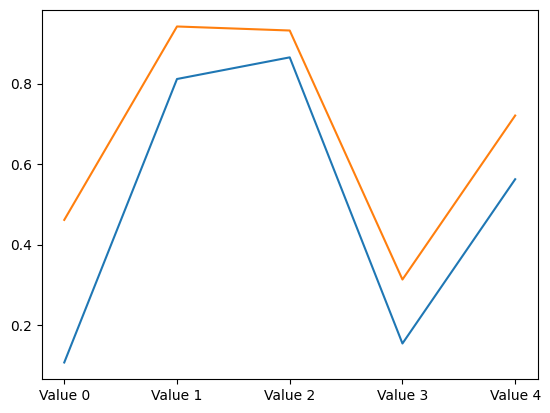

In [204]:
def find_sim_randoms(nr, signal_length):
    rand_df = pd.DataFrame(np.random.random([signal_length, nr]))
    rand_df = rand_df.add_prefix("Signal ")
    rand_df = rand_df.T.add_prefix("Value ")
    plt.plot(rand_df.columns, rand_df.values.T)
    plt.show()
    
    similarities = calculate_similarities(rand_df)
    best_i, best_j, best_value = find_best_pair(similarities)
    plt.plot(rand_df.iloc[best_i])
    plt.plot(rand_df.iloc[best_j])
    plt.show()

find_sim_randoms(30,5)